In [1]:
import sys
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python39/Lib/site-packages")
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python36/Lib/site-packages")

from PIL import Image
import numpy as np
import os
import tensorflow as tf 
import matplotlib.pyplot as plt

In [2]:
data_dir_bi = 'Task 1 Dataset/datasets/bi-class'
data_dir_multi = 'Task 1 Dataset/datasets/multi-class'

In [3]:
datas_bi = os.listdir(data_dir_bi )
print(datas_bi)

['breast-cancer.npz', 'diabetes.npz', 'digit.npz', 'iris.npz', 'wine.npz']


In [4]:
datas_multi = os.listdir(data_dir_multi)
print(datas_multi)

['test_images.mat', 'test_labels.mat', 'train_images.mat', 'train_labels.mat']


In [5]:
breast_cancer = np.load(os.path.join(data_dir_bi,datas_bi[0]))
breast_cancer['train_X'].shape

(547, 10)

In [6]:
train_breast_cancer = breast_cancer['train_X']
train_breast_cancer_labels = breast_cancer['train_Y']
test_breast_cancer = breast_cancer['test_X']
test_breast_cancer_labels = breast_cancer['test_Y']

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(10,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
history = model.fit(train_breast_cancer,train_breast_cancer_labels, validation_split=0.2,epochs=10)

Epoch 1/10
14/14 [==============================] - 0s 10ms/step - loss: 0.0666 - accuracy: 0.9794 - val_loss: 0.0667 - val_accuracy: 0.9727
Epoch 2/10
14/14 [==============================] - 0s 4ms/step - loss: 0.0640 - accuracy: 0.9771 - val_loss: 0.0733 - val_accuracy: 0.9727
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 0.0633 - accuracy: 0.9771 - val_loss: 0.0756 - val_accuracy: 0.9727
Epoch 4/10
14/14 [==============================] - 0s 3ms/step - loss: 0.0630 - accuracy: 0.9794 - val_loss: 0.0718 - val_accuracy: 0.9727
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9771 - val_loss: 0.0785 - val_accuracy: 0.9727
Epoch 6/10
14/14 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9771 - val_loss: 0.0762 - val_accuracy: 0.9727
Epoch 7/10
14/14 [==============================] - 0s 3ms/step - loss: 0.0630 - accuracy: 0.9794 - val_loss: 0.0688 - val_accuracy: 0.9727
Epoch 8/10
14/14 [=

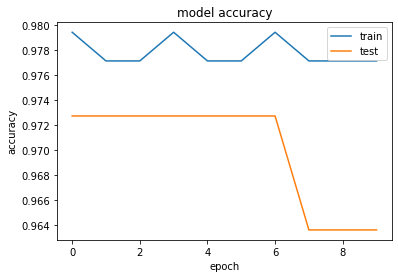

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

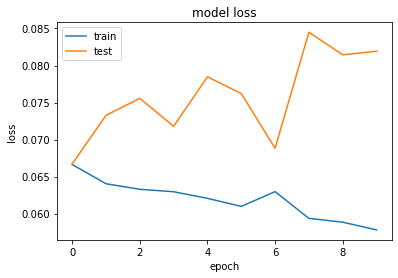

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Reference

[1] https://www.tensorflow.org/tutorials/keras/classification
[2] https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/